In [100]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [101]:
data=pd.read_csv("beer-servings.csv")

In [102]:
data.isna().sum()

,0
Unnamed: 0,0
country,0
beer_servings,8
spirit_servings,8
wine_servings,6
total_litres_of_pure_alcohol,1
continent,0


In [103]:
num_df = data.select_dtypes(include="number")
cat_df = data.select_dtypes(include="object_")

In [104]:
print("numerical columns are ")
num_cols=num_df.columns.tolist()
print(num_cols)

cat_cols=cat_df.columns.tolist()
print("categorical columns are ")
print(cat_cols)

numerical columns are 
['Unnamed: 0', 'beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
categorical columns are 
['country', 'continent']


In [105]:
for col in num_cols:
  num_df[col]=num_df[col].fillna(num_df[col].median())

In [106]:
num_df.isna().sum()

,0
Unnamed: 0,0
beer_servings,0
spirit_servings,0
wine_servings,0
total_litres_of_pure_alcohol,0


In [107]:
def remove_outliers(df,column_name):
  q1=df[column_name].quantile(0.25)
  q3=df[column_name].quantile(0.75)
  iqr=q3-q1
  upper_bound=q3+1.5*iqr
  lower_bound=q1-1.5*iqr
  df[column_name]=df[column_name].clip(upper=upper_bound)
  df[column_name]=df[column_name].clip(lower=lower_bound)
  return df[column_name]

In [108]:
for col in num_cols:
  num_df[col]=remove_outliers(num_df,col)

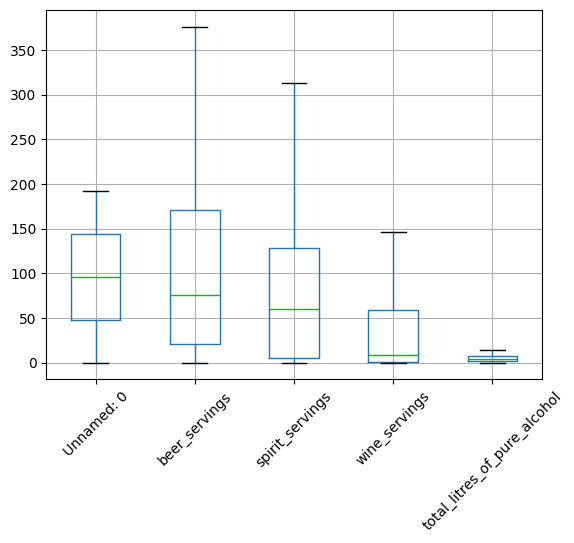

In [109]:
num_df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [110]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_df_scaled=pd.DataFrame(scaler.fit_transform(num_df),columns=num_df.columns)
num_df=num_df_scaled
print("numerical DataFrame after scaling")
num_df.head()

numerical DataFrame after scaling


,Unnamed: 0,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0.000000,0.000000,0.0000,0.000000,0.000000
1,0.005208,0.236702,0.4224,0.369863,0.340278
2,0.010417,0.066489,0.0000,0.095890,0.048611
3,0.015625,0.651596,0.4416,1.000000,0.861111
4,0.020833,0.577128,0.1824,0.308219,0.409722


In [111]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for col in cat_cols:
  cat_df[col]=label_encoder.fit_transform(cat_df[col])
print("categorical DataFrame after encoding")
cat_df.head()

categorical DataFrame after encoding


,country,continent
0,0,1
1,1,2
2,2,0
3,3,2
4,4,0


In [112]:
data=data=pd.concat([num_df,cat_df],axis=1)

In [113]:
y=data["total_litres_of_pure_alcohol"]
X=data.drop(["total_litres_of_pure_alcohol"],axis=1)

In [114]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [115]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import  Ridge, Lasso

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

In [116]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [117]:
ridge_model=Ridge()
ridge_model.fit(X_train,y_train)
print("Ridge Regression model created and trained.")

Ridge Regression model created and trained.


In [118]:
lasso_model=Lasso()
lasso_model.fit(X_train,y_train)
print("Lasso Regression model created and trained.")

Lasso Regression model created and trained.


In [119]:
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)
print("Linear Regression model created and trained.")

Linear Regression model created and trained.


In [120]:
lasso_model = Lasso(alpha=0.001, max_iter=10000)
lasso_model.fit(X_train_scaled, y_train)


Lasso(alpha=0.001, max_iter=10000)

In [121]:
from sklearn.metrics import r2_score

# Evaluate Linear Regression model
y_pred_linear_train = linear_model.predict(X_train)
y_pred_linear_test = linear_model.predict(X_test)

r2_linear_train = r2_score(y_train, y_pred_linear_train)
r2_linear_test = r2_score(y_test, y_pred_linear_test)

print(f"Linear Regression - R2 Score (Train): {r2_linear_train:.4f}")
print(f"Linear Regression - R2 Score (Test): {r2_linear_test:.4f}")

# Evaluate Ridge Regression model
y_pred_ridge_train = ridge_model.predict(X_train)
y_pred_ridge_test = ridge_model.predict(X_test)

r2_ridge_train = r2_score(y_train, y_pred_ridge_train)
r2_ridge_test = r2_score(y_test, y_pred_ridge_test)

print(f"Ridge Regression - R2 Score (Train): {r2_ridge_train:.4f}")
print(f"Ridge Regression - R2 Score (Test): {r2_ridge_test:.4f}")

# Evaluate Lasso Regression model
y_pred_lasso_train = lasso_model.predict(X_train_scaled)
y_pred_lasso_test = lasso_model.predict(X_test_scaled)

r2_lasso_train = r2_score(y_train, y_pred_lasso_train)
r2_lasso_test = r2_score(y_test, y_pred_lasso_test)

print(f"Lasso Regression - R2 Score (Train): {r2_lasso_train:.4f}")
print(f"Lasso Regression - R2 Score (Test): {r2_lasso_test:.4f}")


Linear Regression - R2 Score (Train): 0.8396
Linear Regression - R2 Score (Test): 0.9151
Ridge Regression - R2 Score (Train): 0.8373
Ridge Regression - R2 Score (Test): 0.9156
Lasso Regression - R2 Score (Train): 0.8385
Lasso Regression - R2 Score (Test): 0.9147
